# Análises dos experimentos V1 do BarcodeVision
Analise dos dados de méticas dos experimentos V1 do BarcodeVision. Este expermento teve como objetivo analisar o desempenho dos métodos de detecção e leitura que o sistem tem implementado.

## Importação de bibliotecas
Importação de bibliotecas a serem utilizadas na análise.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Levantamento de informações e dados
Levantando dados e informações de experimento v1 do BarcodeVision para realização de análises.

In [2]:
zbar = pd.read_csv("zbar.csv")
zbar_rotate_multithread = pd.read_csv("zbar_rotate_multithread.csv")
yolo_roi_15_zbar = pd.read_csv("yolo_roi_15_zbar_multithread.csv")
yolo_roi_25_zbar = pd.read_csv("yolo_roi_25_zbar_multithread.csv")
yolo_roi_35_zbar = pd.read_csv("yolo_roi_35_zbar_multithread.csv")
yolo_detecta_zbar_ler = pd.read_csv("yolo_detecta_zbar_ler_multithread.csv")

In [3]:
# Tendo como consideração que nos teste realizados o total de frames legiveis
qtdFramesCod = 218

# Resoluções para ordenação
resolucoes = ["vga", "wvga", "svga", "xga", "sxga", "HD", "uxga", "FHD", "QuadHD", "UltraHD", "DCI4K"]

## Método 1 - Zbar
Detecção e leitura por apenas Zbar

In [4]:
zbar.head()

,frame,resolucao,time_process_ms,detected,read
0,0,vga,9.37,True,True
1,1,vga,10.09,True,True
2,2,vga,9.92,False,False
3,3,vga,9.91,False,False
4,4,vga,10.35,False,False


In [5]:
# Converter resolucao em categoria ordenada
zbar["resolucao"] = pd.Categorical(
    zbar["resolucao"],
    categories=resolucoes,
    ordered=True
)

# Ordenar o DataFrame na nova ordem categórica
zbar = zbar.sort_values("resolucao")

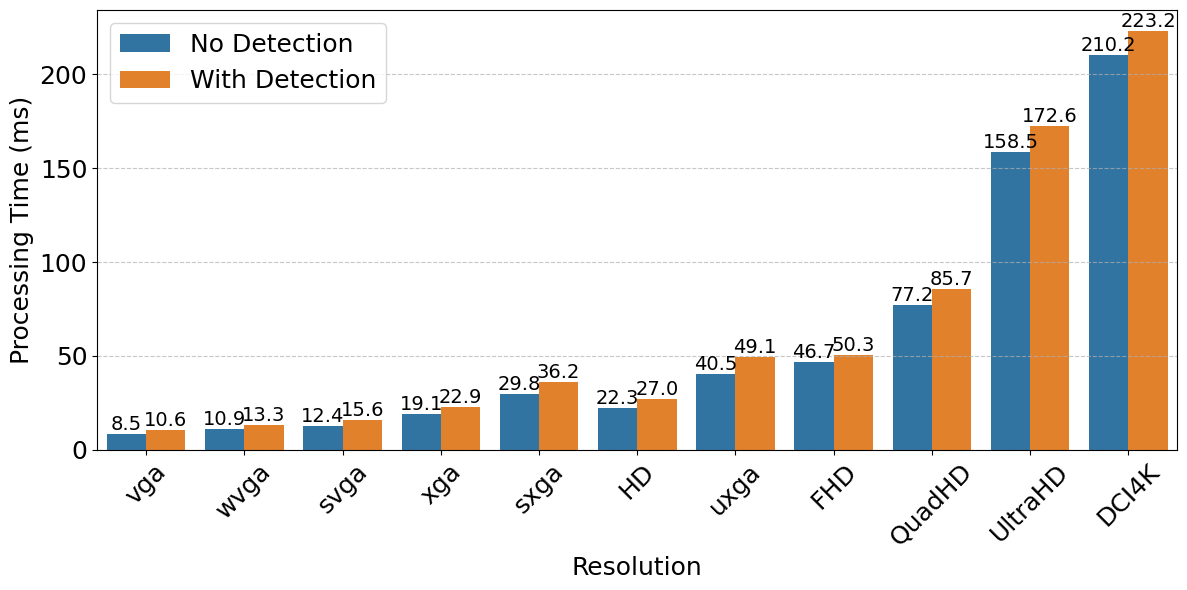

In [6]:
zbarTimeProcess = zbar.groupby(["resolucao", "detected"], observed=True)["time_process_ms"].mean().reset_index()

zbarTimeProcess["detected"] = zbarTimeProcess["detected"].map({True: "With Detection", False: "No Detection"})
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=zbarTimeProcess, x="resolucao", y="time_process_ms", hue="detected")
plt.xlabel("Resolution", fontsize=18)
plt.ylabel("Processing Time (ms)", fontsize=18)
plt.legend(fontsize=18)
plt.xticks(rotation=45,  fontsize=18)
plt.yticks(fontsize=18)

# Adiciona grade no eixo y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adiciona valores sobre as barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', fontsize=14)

plt.tight_layout()
plt.savefig("m1_time_process.png")
plt.show()

In [7]:
ZbarDetectRead = zbar.groupby("resolucao", observed=True).agg(
    qtd_detected=("detected", lambda x: x.sum()),
    qtd_read=("read", lambda x: x.sum())
).reset_index()

In [8]:
ZbarDetectRead["perc_detected"] = ((ZbarDetectRead["qtd_detected"] / qtdFramesCod) * 100).round(1)
ZbarDetectRead["perc_read"] = ((ZbarDetectRead["qtd_read"] / qtdFramesCod) * 100).round(2)
ZbarDetectRead["perc_detected"] = np.minimum(ZbarDetectRead["perc_detected"], 100)
ZbarDetectRead

,resolucao,qtd_detected,qtd_read,perc_detected,perc_read
0,vga,43,43,19.7,19.72
1,wvga,76,76,34.9,34.86
2,svga,79,79,36.2,36.24
3,xga,92,92,42.2,42.20
4,sxga,77,77,35.3,35.32
5,HD,84,84,38.5,38.53
6,uxga,78,78,35.8,35.78
7,FHD,36,36,16.5,16.51
8,QuadHD,38,38,17.4,17.43
9,UltraHD,27,27,12.4,12.39


In [9]:
percentualMedioDetectM1 = ZbarDetectRead["perc_detected"].median()
percentualMedioDetectM1.round(2)

np.float64(34.9)

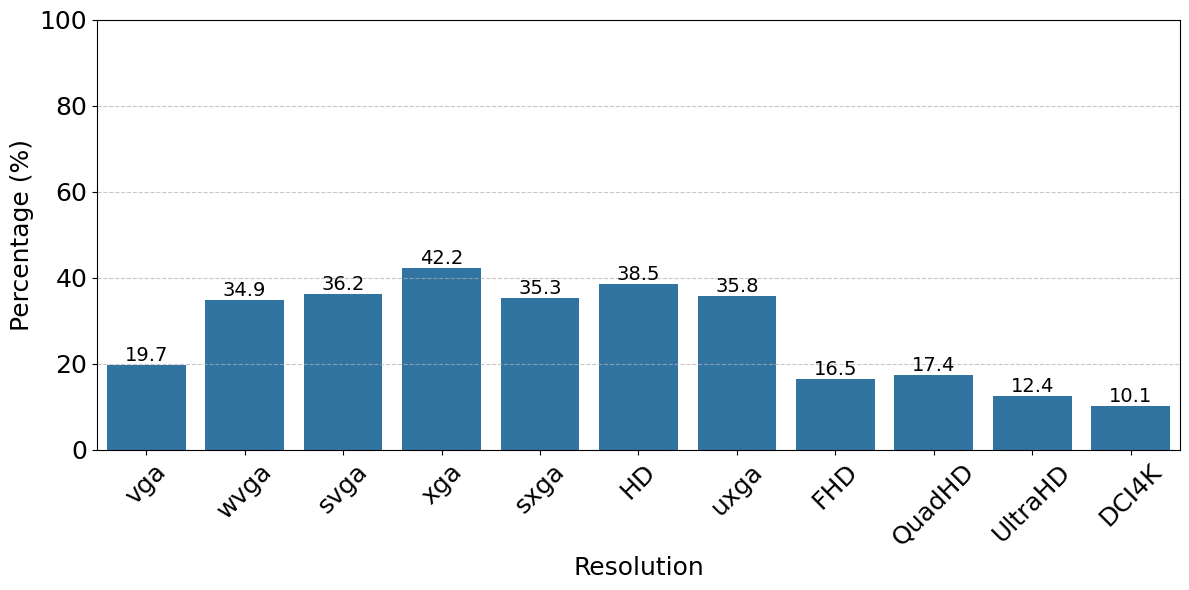

In [10]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=ZbarDetectRead, x="resolucao", y="perc_read")
# plt.title("Percentual de Leitura por Resolução - Apenas Zbar")
plt.ylabel("Percentage (%)", fontsize=18)
plt.xlabel("Resolution", fontsize=18)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(0, 100)

# Adiciona grade no eixo y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adiciona valores sobre as barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', fontsize=14)

plt.tight_layout()
plt.savefig("m1_perc_read.png")
plt.show()

## Método 2 - Zbar com Rotação em Multithread
Método de leitura aplicando Rotação em Multithread com Zbar

In [11]:
zbar_rotate_multithread.head()

,frame,resolucao,time_process_ms,detected,read
0,0,vga,9.49,True,True
1,1,vga,10.12,True,True
2,2,vga,67.65,False,False
3,3,vga,49.15,False,False
4,4,vga,63.51,False,False


In [12]:
# Converter resolucao em categoria ordenada
zbar_rotate_multithread["resolucao"] = pd.Categorical(
    zbar_rotate_multithread["resolucao"],
    categories=resolucoes,
    ordered=True
)

# Ordenar o DataFrame na nova ordem categórica
zbar_rotate_multithread = zbar_rotate_multithread.sort_values("resolucao")

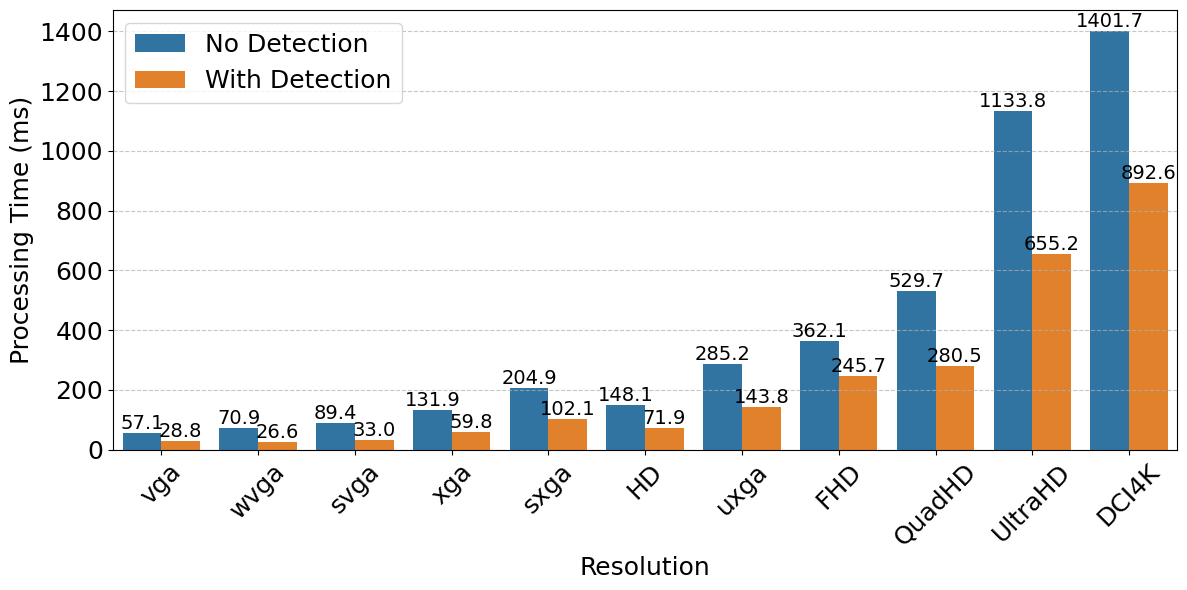

In [13]:
zbarMultithrreadTimeProcess = zbar_rotate_multithread.groupby(["resolucao", "detected"], observed=True)["time_process_ms"].mean().reset_index()

zbarMultithrreadTimeProcess["detected"] = zbarMultithrreadTimeProcess["detected"].map({True: "With Detection", False: "No Detection"})
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=zbarMultithrreadTimeProcess, x="resolucao", y="time_process_ms", hue="detected")
# plt.title("Tempo médio de processamento por resolução - Zbar com rotaçã em Multithread")
plt.xlabel("Resolution", fontsize=18)
plt.ylabel("Processing Time (ms)", fontsize=18)
plt.legend(fontsize=18)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)

# Adiciona grade no eixo y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adiciona valores sobre as barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', fontsize=14)

plt.tight_layout()
plt.savefig("m2_time_process.png")
plt.show()

In [14]:
zbarRotateDetectRead = zbar_rotate_multithread.groupby("resolucao", observed=True).agg(
    qtd_detected=("detected", lambda x: x.sum()),
    qtd_read=("read", lambda x: x.sum())
).reset_index()

In [15]:
zbarRotateDetectRead["perc_detected"] = ((zbarRotateDetectRead["qtd_detected"] / qtdFramesCod) * 100).round(1)
zbarRotateDetectRead["perc_read"] = ((zbarRotateDetectRead["qtd_read"] / qtdFramesCod) * 100).round(2)
zbarRotateDetectRead["perc_detected"] = np.minimum(zbarRotateDetectRead["perc_detected"], 100)
zbarRotateDetectRead

,resolucao,qtd_detected,qtd_read,perc_detected,perc_read
0,vga,67,67,30.7,30.73
1,wvga,98,98,45.0,44.95
2,svga,109,109,50.0,50.00
3,xga,156,156,71.6,71.56
4,sxga,137,137,62.8,62.84
5,HD,141,141,64.7,64.68
6,uxga,144,144,66.1,66.06
7,FHD,114,114,52.3,52.29
8,QuadHD,82,82,37.6,37.61
9,UltraHD,61,61,28.0,27.98


In [16]:
percentualMedioDetectM2 = zbarRotateDetectRead["perc_detected"].median()
percentualMedioDetectM2.round(2)

np.float64(50.0)

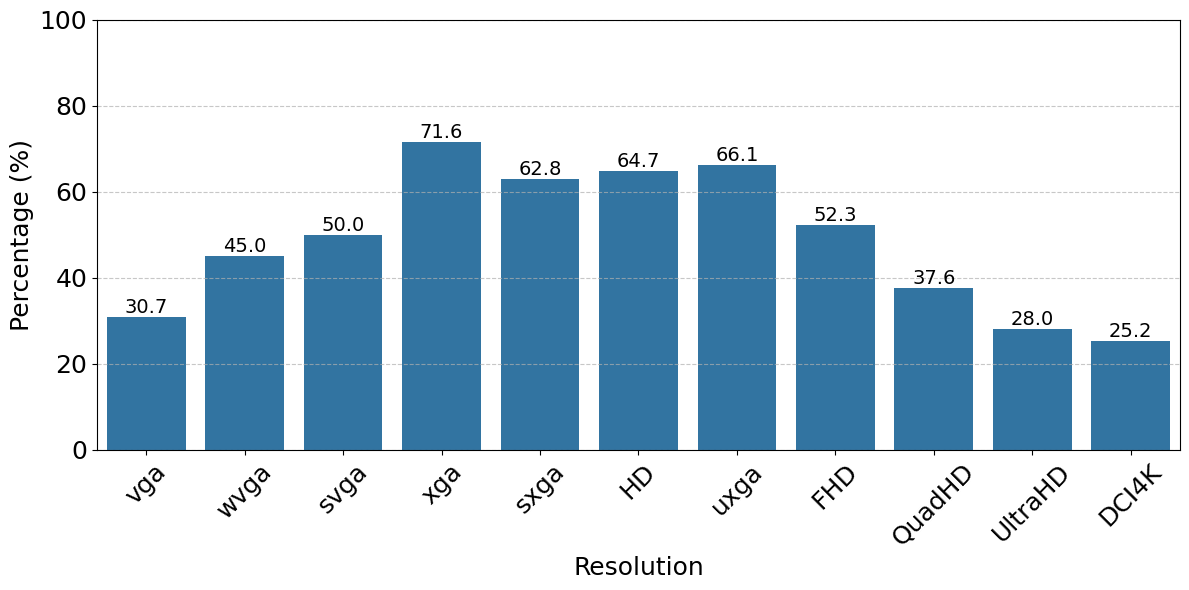

In [17]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=zbarRotateDetectRead, x="resolucao", y="perc_read")
# plt.title("Percentual de Leitura por Resolução - Zbar com Rotação em Multithread")
plt.ylabel("Percentage (%)", fontsize=18)
plt.xlabel("Resolution", fontsize=18)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(0, 100)

# Adiciona grade no eixo y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adiciona valores sobre as barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', fontsize=14)

plt.tight_layout()
plt.savefig("m2_perc_read.png")
plt.show()

## Metódo 3
Detecção com Yolov4 e Leitura por região de interesse com Zbar realizando Rotatção em Multithread

### Metódo 3.1 
Realizando leitura por roi quadrado com padding de 15% 

In [18]:
yolo_roi_15_zbar.head()

,frame,resolucao,time_process_ms,detected,read
0,0,vga,924.16,True,True
1,1,vga,25.67,True,True
2,2,vga,45.09,True,True
3,3,vga,50.17,True,False
4,4,vga,56.37,True,False


In [19]:
# Converter resolucao em categoria ordenada
yolo_roi_15_zbar["resolucao"] = pd.Categorical(
    yolo_roi_15_zbar["resolucao"],
    categories=resolucoes,
    ordered=True
)

# Ordenar o DataFrame na nova ordem categórica
yolo_roi_15_zbar = yolo_roi_15_zbar.sort_values("resolucao")

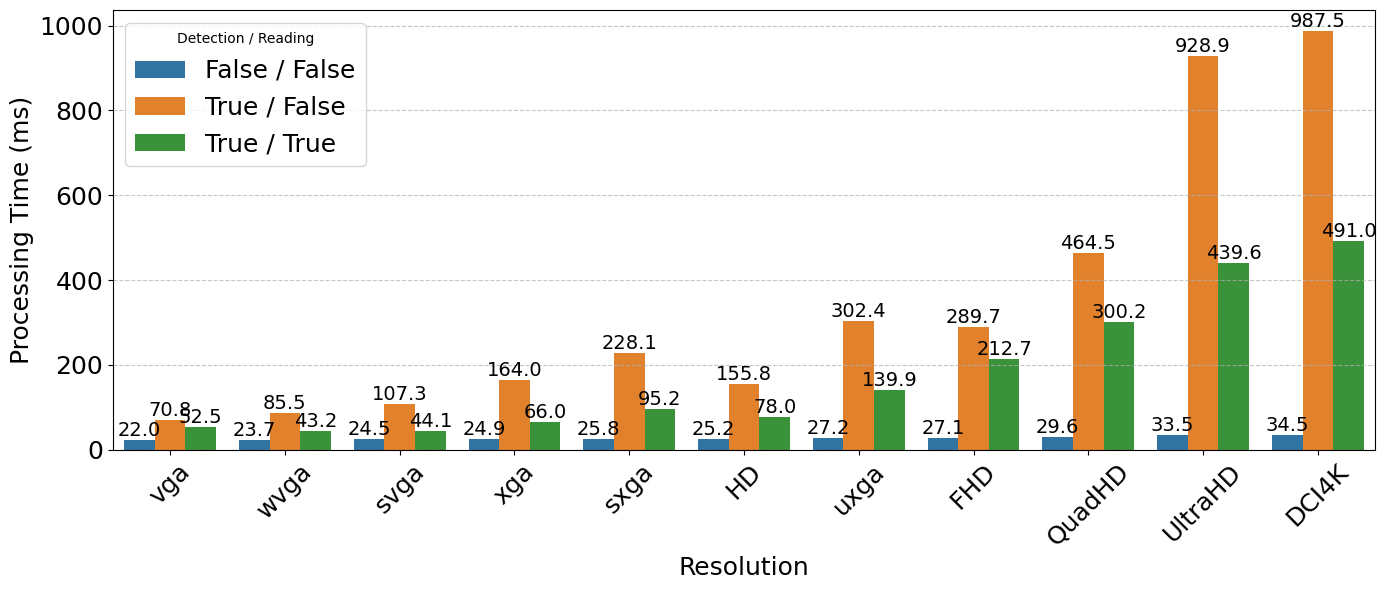

In [20]:
yoloRoi15zbarTimeProcess = yolo_roi_15_zbar.groupby(["resolucao", "detected", "read"], observed=True)["time_process_ms"].mean().reset_index()
yoloRoi15zbarTimeProcess["det_read"] = yoloRoi15zbarTimeProcess["detected"].astype(str) + " / " + yoloRoi15zbarTimeProcess["read"].astype(str)

# Cria o gráfico
plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=yoloRoi15zbarTimeProcess,
    x="resolucao",
    y="time_process_ms",
    hue="det_read"
)
# plt.title("Tempo médio de processamento por resolução\nDetecção com Yolo e leitura por ROI 15% com Zbar em Rotatação em Multithread")
plt.xlabel("Resolution", fontsize=18)
plt.ylabel("Processing Time (ms)", fontsize=18)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)
plt.legend(title="Detection / Reading", fontsize=18)
# Adiciona grade no eixo y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adiciona valores sobre as barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', fontsize=14)
plt.tight_layout()
plt.savefig("m3.1_time_process.png")
plt.show()

In [21]:
yoloDetectRoi15Zbar = yolo_roi_15_zbar.groupby("resolucao", observed=True).agg(
    qtd_detected=("detected", lambda x: x.sum()),
    qtd_read=("read", lambda x: x.sum())
).reset_index()

In [22]:
yoloDetectRoi15Zbar["perc_detected"] = ((yoloDetectRoi15Zbar["qtd_detected"] / qtdFramesCod) * 100).round(1)
yoloDetectRoi15Zbar["perc_read"] = ((yoloDetectRoi15Zbar["qtd_read"] / qtdFramesCod) * 100).round(2)
yoloDetectRoi15Zbar["perc_detected"] = np.minimum(yoloDetectRoi15Zbar["perc_detected"], 100)
yoloDetectRoi15Zbar

,resolucao,qtd_detected,qtd_read,perc_detected,perc_read
0,vga,181,46,83.0,21.10
1,wvga,182,73,83.5,33.49
2,svga,181,76,83.0,34.86
3,xga,184,104,84.4,47.71
4,sxga,182,93,83.5,42.66
5,HD,183,96,83.9,44.04
6,uxga,182,106,83.5,48.62
7,FHD,182,66,83.5,30.28
8,QuadHD,183,38,83.9,17.43
9,UltraHD,181,23,83.0,10.55


In [23]:
percentualMedioDetectRoi15 = yoloDetectRoi15Zbar["perc_detected"].mean()
percentualMedioDetectRoi15

np.float64(83.47272727272727)

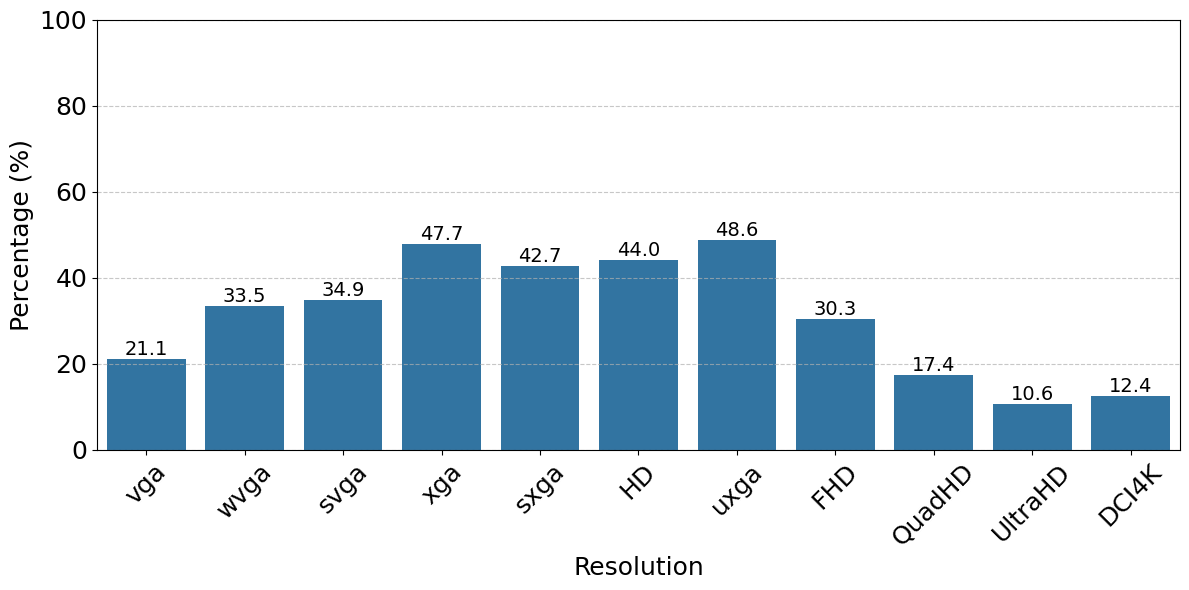

In [24]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=yoloDetectRoi15Zbar, x="resolucao", y="perc_read")
# plt.title("Percentual de Leitura por Resolução\nDetecção com Yolo e leitura por ROI 15% com Zbar em Rotatação em Multithread")
plt.ylabel("Percentage (%)", fontsize=18)
plt.xlabel("Resolution", fontsize=18)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(0, 100)

# Adiciona grade no eixo y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adiciona valores sobre as barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', fontsize=14)

plt.tight_layout()
plt.savefig("m3.1_perc_read.png")
plt.show()

### Metódo 3.2
Realizando leitura por roi quadrado com padding de 25% 

In [25]:
yolo_roi_25_zbar.head()

,frame,resolucao,time_process_ms,detected,read
0,0,vga,926.14,True,True
1,1,vga,25.43,True,True
2,2,vga,48.97,True,False
3,3,vga,56.45,True,False
4,4,vga,60.95,True,False


In [26]:
# Converter resolucao em categoria ordenada
yolo_roi_25_zbar["resolucao"] = pd.Categorical(
    yolo_roi_25_zbar["resolucao"],
    categories=resolucoes,
    ordered=True
)

# Ordenar o DataFrame na nova ordem categórica
yolo_roi_25_zbar = yolo_roi_25_zbar.sort_values("resolucao")

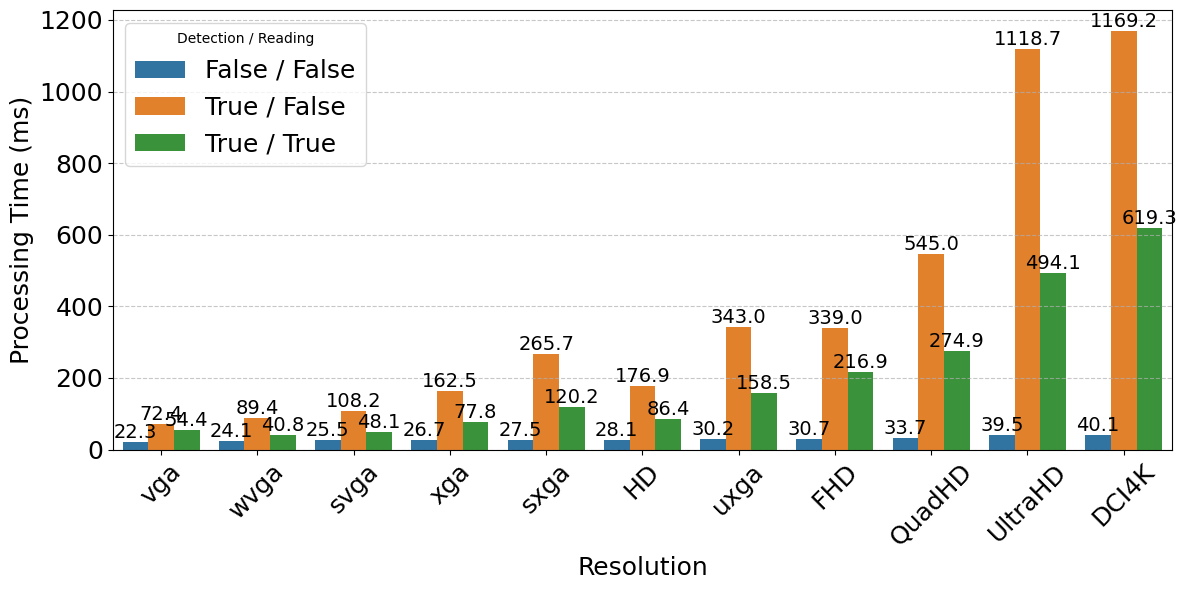

In [27]:
yoloRoi25zbarTimeProcess = yolo_roi_25_zbar.groupby(["resolucao", "detected", "read"], observed=True)["time_process_ms"].mean().reset_index()
yoloRoi25zbarTimeProcess["det_read"] = yoloRoi25zbarTimeProcess["detected"].astype(str) + " / " + yoloRoi25zbarTimeProcess["read"].astype(str)

# Cria o gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=yoloRoi25zbarTimeProcess,
    x="resolucao",
    y="time_process_ms",
    hue="det_read"
)
# plt.title("Tempo médio de processamento por resolução\nDetecção com Yolo e leitura por ROI 25% com Zbar em Rotatação em Multithread")
plt.xlabel("Resolution", fontsize=18)
plt.ylabel("Processing Time (ms)", fontsize=18)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)
plt.legend(title="Detection / Reading", fontsize=18)

# Adiciona grade no eixo y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adiciona valores sobre as barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', fontsize=14)

plt.tight_layout()
plt.savefig("m3.2_time_process.png")
plt.show()

In [28]:
yoloDetectRoi25Zbar = yolo_roi_25_zbar.groupby("resolucao", observed=True).agg(
    qtd_detected=("detected", lambda x: x.sum()),
    qtd_read=("read", lambda x: x.sum())
).reset_index()

In [29]:
yoloDetectRoi25Zbar["perc_detected"] = ((yoloDetectRoi25Zbar["qtd_detected"] / qtdFramesCod) * 100).round(1)
yoloDetectRoi25Zbar["perc_read"] = ((yoloDetectRoi25Zbar["qtd_read"] / qtdFramesCod) * 100).round(2)
yoloDetectRoi25Zbar["perc_detected"] = np.minimum(yoloDetectRoi25Zbar["perc_detected"], 100)
yoloDetectRoi25Zbar

,resolucao,qtd_detected,qtd_read,perc_detected,perc_read
0,vga,181,53,83.0,24.31
1,wvga,182,72,83.5,33.03
2,svga,181,91,83.0,41.74
3,xga,184,124,84.4,56.88
4,sxga,182,108,83.5,49.54
5,HD,183,103,83.9,47.25
6,uxga,182,114,83.5,52.29
7,FHD,182,70,83.5,32.11
8,QuadHD,183,51,83.9,23.39
9,UltraHD,181,34,83.0,15.60


In [30]:
percentualMedioDetectRoi25 = yoloDetectRoi25Zbar["perc_detected"].mean()
percentualMedioDetectRoi25

np.float64(83.47272727272727)

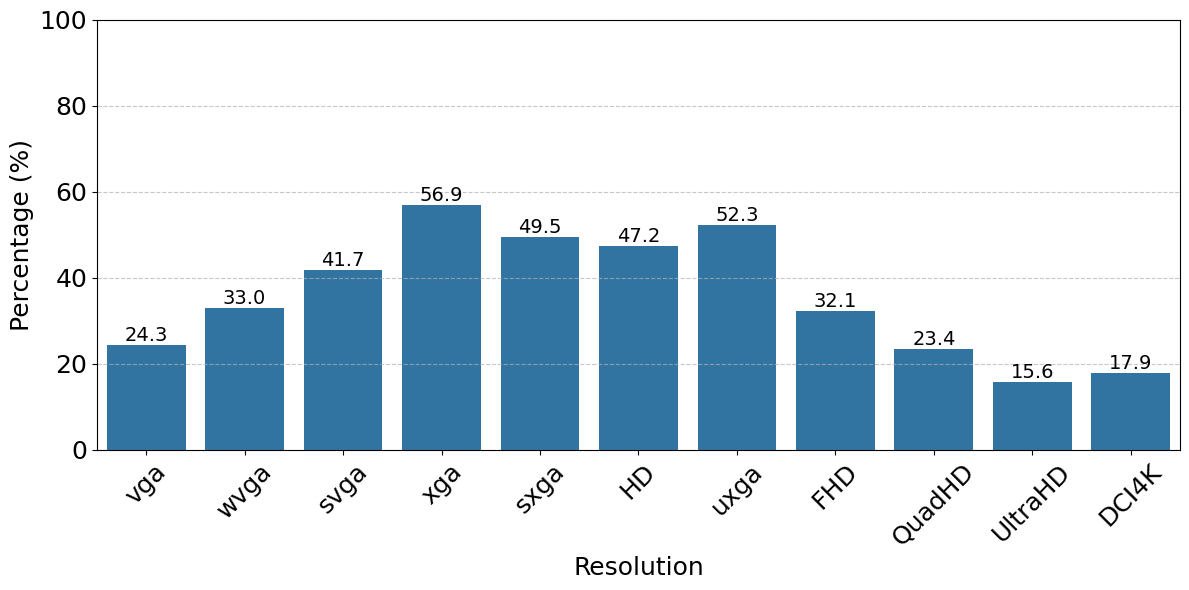

In [31]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=yoloDetectRoi25Zbar, x="resolucao", y="perc_read")
# plt.title("Percentual de Leitura por Resolução\nDetecção com Yolo e leitura por ROI 25% com Zbar em Rotatação em Multithread")
plt.ylabel("Percentage (%)", fontsize=18)
plt.xlabel("Resolution", fontsize=18)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(0, 100)

# Adiciona grade no eixo y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adiciona valores sobre as barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', fontsize=14)

plt.tight_layout()
plt.savefig("m3.2_perc_read.png")
plt.show()

### Metódo 3.3 
Realizando leitura por roi quadrado com padding de 35% 

In [32]:
yolo_roi_35_zbar.head()

,frame,resolucao,time_process_ms,detected,read
0,0,vga,931.50,True,True
1,1,vga,27.67,True,True
2,2,vga,61.14,True,False
3,3,vga,58.29,True,True
4,4,vga,66.19,True,False


In [33]:
# Converter resolucao em categoria ordenada
yolo_roi_35_zbar["resolucao"] = pd.Categorical(
    yolo_roi_35_zbar["resolucao"],
    categories=resolucoes,
    ordered=True
)

# Ordenar o DataFrame na nova ordem categórica
yolo_roi_35_zbar = yolo_roi_35_zbar.sort_values("resolucao")

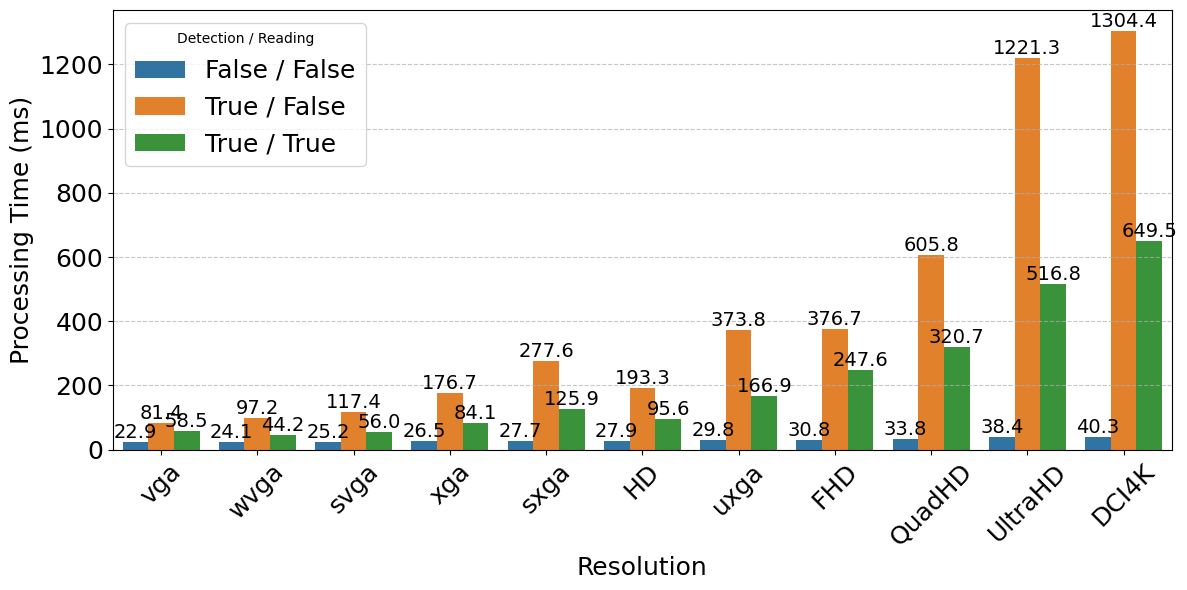

In [34]:
yoloRoi35zbarTimeProcess = yolo_roi_35_zbar.groupby(["resolucao", "detected", "read"], observed=True)["time_process_ms"].mean().reset_index()
yoloRoi35zbarTimeProcess["det_read"] = yoloRoi35zbarTimeProcess["detected"].astype(str) + " / " + yoloRoi35zbarTimeProcess["read"].astype(str)

# Cria o gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=yoloRoi35zbarTimeProcess,
    x="resolucao",
    y="time_process_ms",
    hue="det_read"
)
# plt.title("Tempo médio de processamento por resolução\nDetecção com Yolo e leitura por ROI 35% com Zbar em Rotatação em Multithread")
plt.xlabel("Resolution", fontsize=18)
plt.ylabel("Processing Time (ms)", fontsize=18)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)
plt.legend(title="Detection / Reading", fontsize=18)
# Adiciona grade no eixo y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adiciona valores sobre as barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', fontsize=14)
plt.tight_layout()
plt.savefig("m3.3_time_process.png")
plt.show()

In [35]:
yoloDetectRoi35Zbar = yolo_roi_35_zbar.groupby("resolucao", observed=True).agg(
    qtd_detected=("detected", lambda x: x.sum()),
    qtd_read=("read", lambda x: x.sum())
).reset_index()

In [36]:
yoloDetectRoi35Zbar["perc_detected"] = ((yoloDetectRoi35Zbar["qtd_detected"] / qtdFramesCod) * 100).round(1)
yoloDetectRoi35Zbar["perc_read"] = ((yoloDetectRoi35Zbar["qtd_read"] / qtdFramesCod) * 100).round(2)
yoloDetectRoi35Zbar["perc_detected"] = np.minimum(yoloDetectRoi35Zbar["perc_detected"], 100)
yoloDetectRoi35Zbar

,resolucao,qtd_detected,qtd_read,perc_detected,perc_read
0,vga,181,46,83.0,21.10
1,wvga,182,80,83.5,36.70
2,svga,181,95,83.0,43.58
3,xga,184,132,84.4,60.55
4,sxga,182,111,83.5,50.92
5,HD,183,120,83.9,55.05
6,uxga,182,112,83.5,51.38
7,FHD,182,90,83.5,41.28
8,QuadHD,183,57,83.9,26.15
9,UltraHD,181,36,83.0,16.51


In [37]:
percentualMedioDetectRoi35 = yoloDetectRoi35Zbar["perc_detected"].mean()
percentualMedioDetectRoi35

np.float64(83.47272727272727)

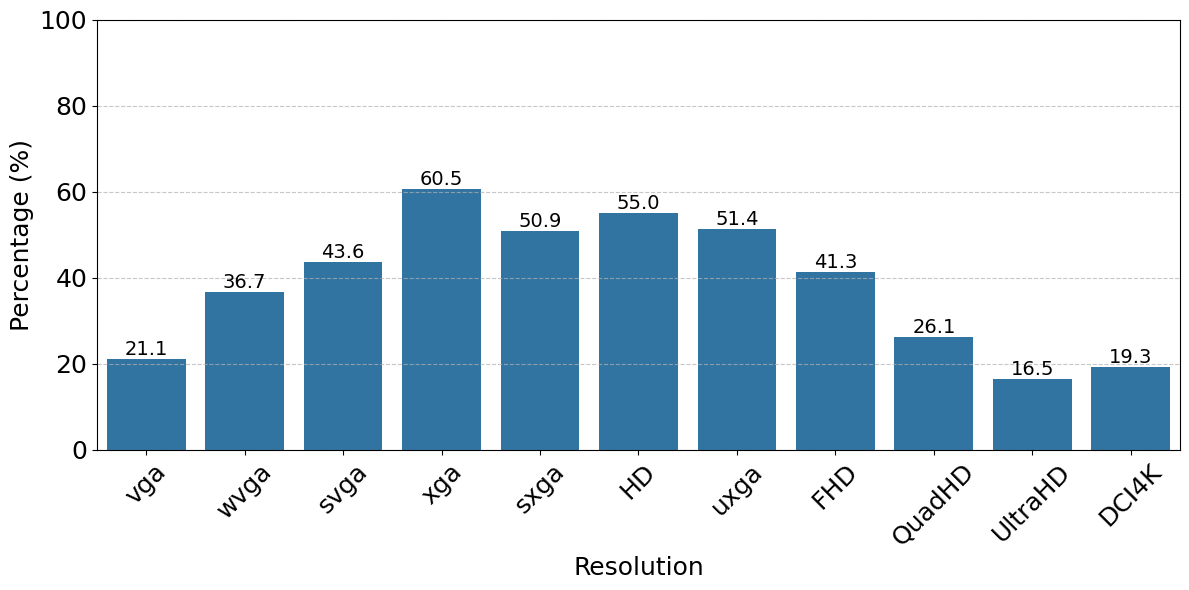

In [38]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=yoloDetectRoi35Zbar, x="resolucao", y="perc_read")
# plt.title("Percentual de Leitura por Resolução\nDetecção com Yolo e leitura por ROI 35% com Zbar em Rotatação em Multithread")
plt.ylabel("Percentage (%)", fontsize=18)
plt.xlabel("Resolution", fontsize=18)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(0, 100)

# Adiciona grade no eixo y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adiciona valores sobre as barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', fontsize=14)

plt.tight_layout()
plt.savefig("m3.3_perc_read.png")
plt.show()

### Comparativo de percentual de leitura

In [39]:
yoloDetectRoi15Zbar["metodo"] = "YOLO + ROI 15%"
yoloDetectRoi25Zbar["metodo"] = "YOLO + ROI 25%"
yoloDetectRoi35Zbar["metodo"] = "YOLO + ROI 35%"

In [40]:
# Juntar todos os DataFrames
comparativoPercLeituraM3 = pd.concat([
    yoloDetectRoi15Zbar,
    yoloDetectRoi25Zbar,
    yoloDetectRoi35Zbar,
])

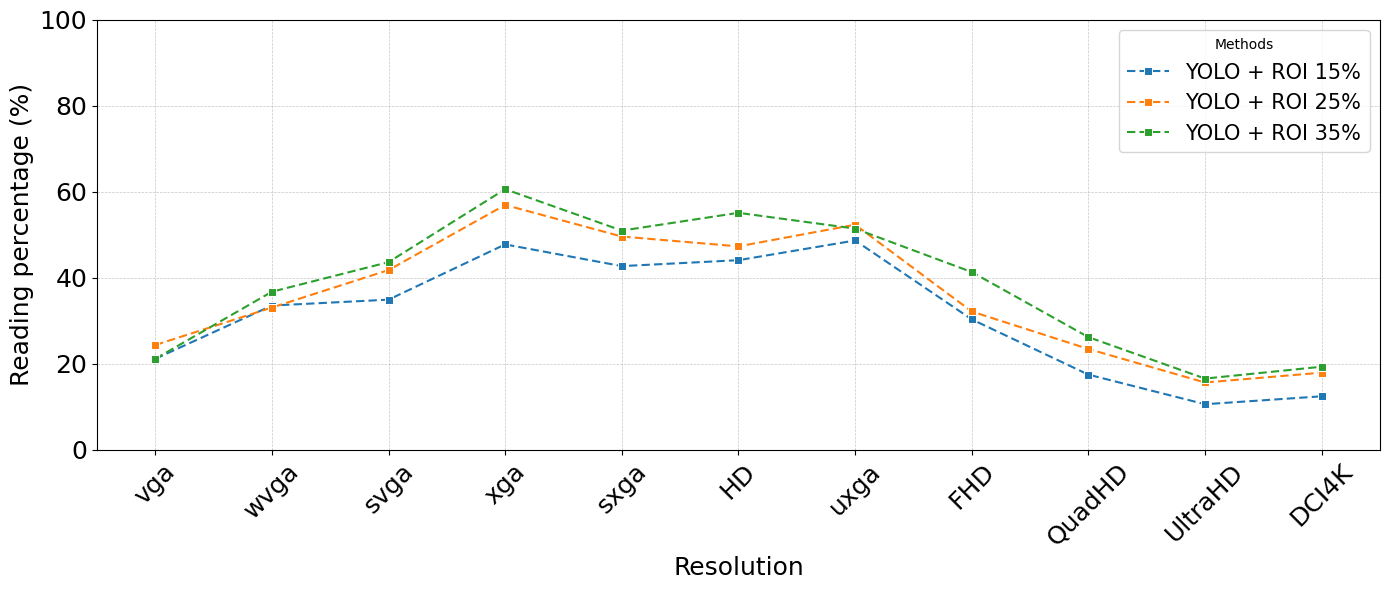

In [41]:
plt.figure(figsize=(14, 6))
ax = sns.lineplot(
    data=comparativoPercLeituraM3,
    x="resolucao",
    y="perc_read",
    hue="metodo",
    marker="s",
    style="metodo",
    dashes=[(4, 2)] * comparativoPercLeituraM3["metodo"].nunique()
)

# plt.title("Comparativo de Percentual Leitura Entre os Métodos por Resolução")
plt.ylabel("Reading percentage (%)", fontsize=18)
plt.xlabel("Resolution", fontsize=18)
plt.ylim(0, 100)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(title="Methods", fontsize=15)
# Adiciona grade no eixo y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adiciona valores sobre as barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', fontsize=14)
plt.tight_layout()
plt.savefig("m3_perc_read_comper.png")
plt.show()

In [42]:
pMedianM3_1 = yoloDetectRoi15Zbar["perc_detected"].median()
pMedianM3_2 = yoloDetectRoi25Zbar["perc_detected"].median()
pMedianM3_3 = yoloDetectRoi35Zbar["perc_detected"].median()
percentualMedianoDetectM3 = (pMedianM3_1+pMedianM3_2+pMedianM3_3)/3
percentualMedianoDetectM3.round(2)

np.float64(83.5)

## Método 4
Detecção de código com yolo e leitura do frame com Zbar em rotação multithread

In [43]:
yolo_detecta_zbar_ler.head()

,frame,resolucao,time_process_ms,detected,read
0,0,vga,99.02,True,True
1,1,vga,28.22,True,True
2,2,vga,82.81,True,False
3,3,vga,68.11,True,False
4,4,vga,70.20,True,False


In [44]:
# Converter resolucao em categoria ordenada
yolo_detecta_zbar_ler["resolucao"] = pd.Categorical(
    yolo_detecta_zbar_ler["resolucao"],
    categories=resolucoes,
    ordered=True
)

# Ordenar o DataFrame na nova ordem categórica
yolo_detecta_zbar_ler = yolo_detecta_zbar_ler.sort_values("resolucao")

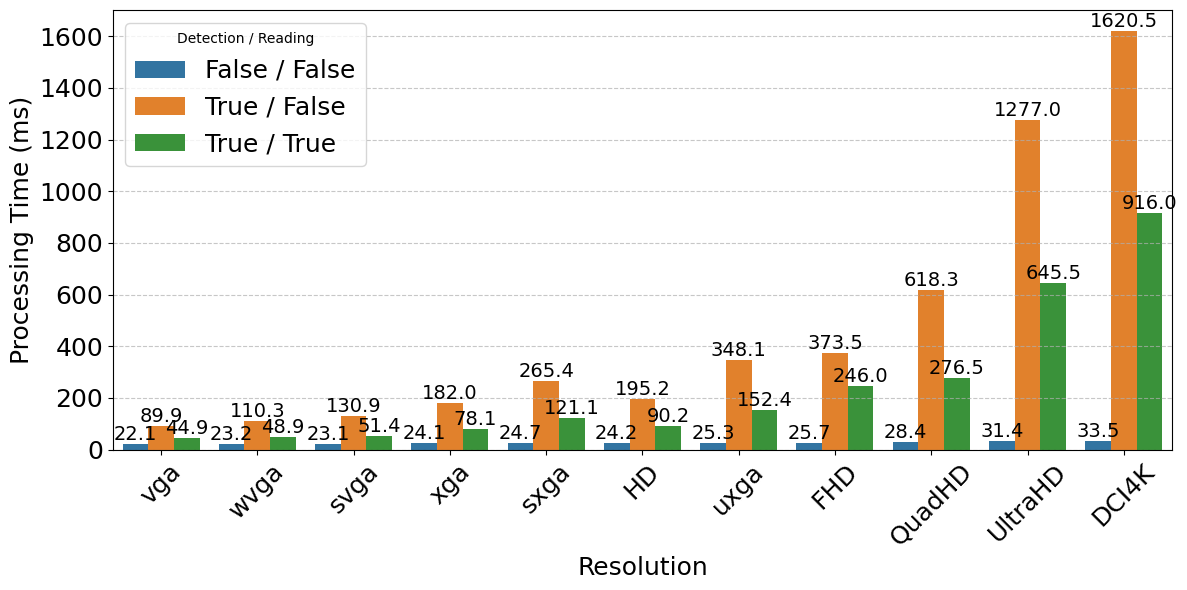

In [45]:
yoloDetectaZbarLerTimeProcess = yolo_detecta_zbar_ler.groupby(["resolucao", "detected", "read"], observed=True)["time_process_ms"].mean().reset_index()
yoloDetectaZbarLerTimeProcess["det_read"] = yoloDetectaZbarLerTimeProcess["detected"].astype(str) + " / " + yoloDetectaZbarLerTimeProcess["read"].astype(str)

# Cria o gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=yoloDetectaZbarLerTimeProcess,
    x="resolucao",
    y="time_process_ms",
    hue="det_read"
)
# plt.title("Tempo médio de processamento por resolução\nDetecção com Yolo e leitura com Zbar em Rotatação em Multithread")
plt.xlabel("Resolution", fontsize=18)
plt.ylabel("Processing Time (ms)", fontsize=18)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)
plt.legend(title="Detection / Reading", fontsize=18)

# Adiciona grade no eixo y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adiciona valores sobre as barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', fontsize=14)

plt.tight_layout()
plt.savefig("m4_time_process.png")
plt.show()

In [46]:
yoloDetecZbarLer = yolo_detecta_zbar_ler.groupby("resolucao", observed=True).agg(
    qtd_detected=("detected", lambda x: x.sum()),
    qtd_read=("read", lambda x: x.sum())
).reset_index()

In [47]:
yoloDetecZbarLer["perc_detected"] = ((yoloDetecZbarLer["qtd_detected"] / qtdFramesCod) * 100).round(1)
yoloDetecZbarLer["perc_read"] = ((yoloDetecZbarLer["qtd_read"] / qtdFramesCod) * 100).round(2)
yoloDetecZbarLer["perc_detected"] = np.minimum(yoloDetecZbarLer["perc_detected"], 100)
yoloDetecZbarLer

,resolucao,qtd_detected,qtd_read,perc_detected,perc_read
0,vga,181,53,83.0,24.31
1,wvga,182,83,83.5,38.07
2,svga,181,90,83.0,41.28
3,xga,182,130,83.5,59.63
4,sxga,181,116,83.0,53.21
5,HD,183,118,83.9,54.13
6,uxga,183,122,83.9,55.96
7,FHD,182,95,83.5,43.58
8,QuadHD,183,63,83.9,28.90
9,UltraHD,181,46,83.0,21.10


In [48]:
percentualMedioDetectM4 = yoloDetecZbarLer["perc_detected"].mean()
percentualMedianoDetectM4 = yoloDetecZbarLer["perc_detected"].median()
percentualMedianoDetectM4.round(2)

np.float64(83.5)

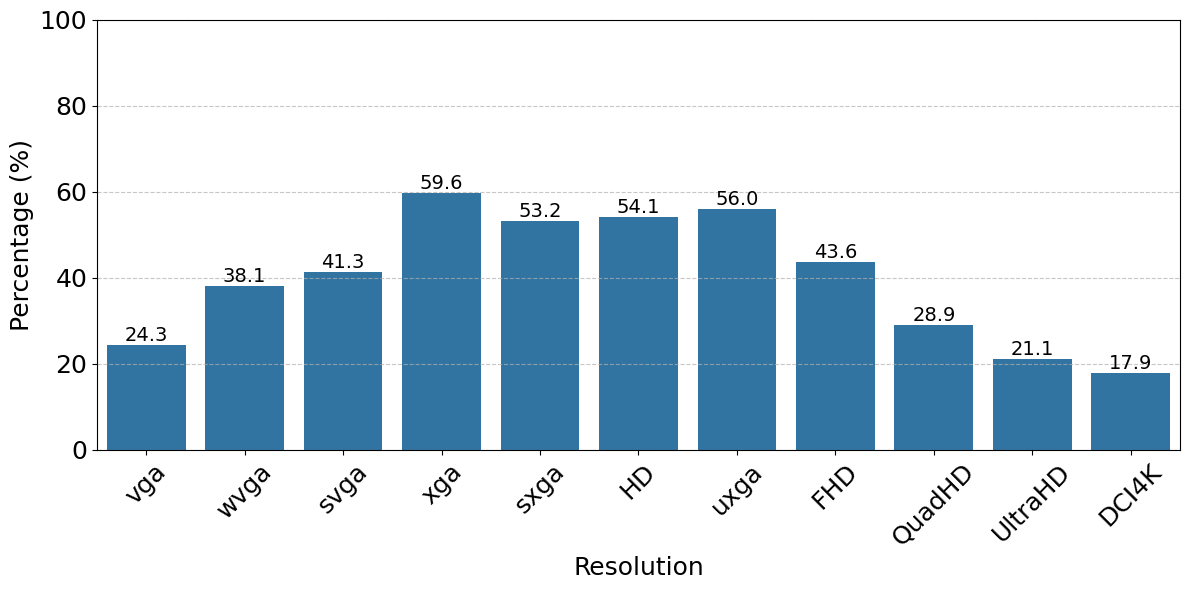

In [49]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=yoloDetecZbarLer, x="resolucao", y="perc_read")
# plt.title("Percentual de Leitura por Resolução\nDetecção com Yolo e leitura com Zbar em Rotatação em Multithread")
plt.ylabel("Percentage (%)", fontsize=18)
plt.xlabel("Resolution", fontsize=18)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(0, 100)

# Adiciona grade no eixo y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adiciona valores sobre as barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', fontsize=14)

plt.tight_layout()
plt.savefig("m4_perc_read.png")
plt.show()

## Analise comparativas
Análise comparativas entre os métodos de leitura

In [50]:
# Descobir o percentual médio de detecção do yolo
percentualMedioDetectYolo = (percentualMedioDetectRoi15+percentualMedioDetectRoi25+percentualMedioDetectRoi35+percentualMedioDetectM4)/4
print(f"Percentual médio de detecção usando YOLOv4: {percentualMedioDetectM4:0.2f}")

Percentual médio de detecção usando YOLOv4: 83.38


In [51]:
# Adicionar a coluna do nome do método
zbarRotateDetectRead["metodo"] = "Zbar Rotate"
# yoloDetectRoi15Zbar["metodo"] = "YOLO + ROI 15%"
# yoloDetectRoi25Zbar["metodo"] = "YOLO + ROI 25%"
# yoloDetectRoi35Zbar["metodo"] = "YOLO + ROI 35%"
yoloDetecZbarLer["metodo"] = "YOLO + Zbar direto"

# Juntar todos os DataFrames
comparativoMetodos = pd.concat([
    zbarRotateDetectRead,
    yoloDetectRoi15Zbar,
    yoloDetectRoi25Zbar,
    yoloDetectRoi35Zbar,
    yoloDetecZbarLer
])

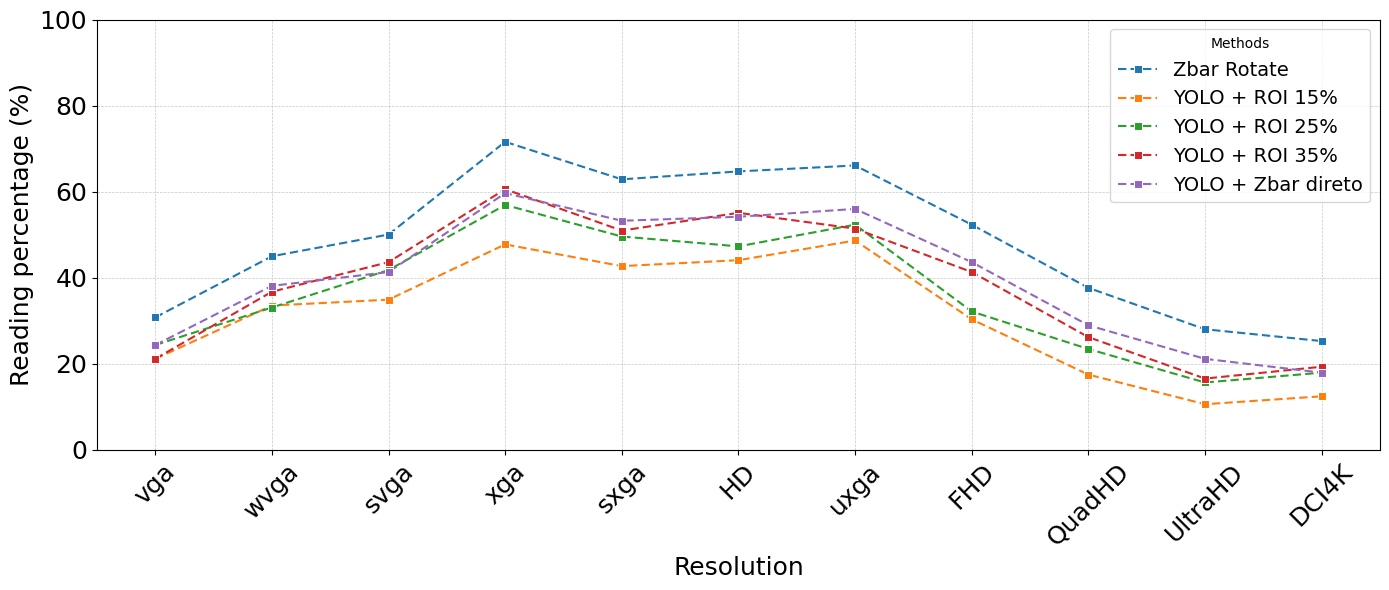

In [52]:
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=comparativoMetodos,
    x="resolucao",
    y="perc_read",
    hue="metodo",
    marker="s",
    style="metodo",
    dashes=[(4, 2)] * comparativoMetodos["metodo"].nunique()
)

# plt.title("Comparativo de Percentual Leitura Entre os Métodos por Resolução")
plt.ylabel("Reading percentage (%)", fontsize=18)
plt.xlabel("Resolution", fontsize=18)
plt.ylim(0, 100)
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(title="Methods", fontsize=14)
plt.tight_layout()
plt.savefig("comparativo_metodos.png")
plt.show()